#  Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Collection

## Import Data into initial DFs and explore

### A. Churn: this is the main, consolidated dataset

In [2]:
file = 'Dataset1/Telco_customer_churn.xlsx'
sheet = 'Telco_Churn'

churn = pd.read_excel(file, sheet)

In [3]:
churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
churn.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [5]:
churn.sample(7)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1280,1565-RHDJD,1,United States,California,Palo Cedro,96073,"40.582399, -122.195512",40.582399,-122.195512,Female,...,Month-to-month,No,Bank transfer (automatic),84.05,333.55,Yes,1,95,5552,Competitor offered higher download speeds
5852,5057-RKGLH,1,United States,California,Daggett,92327,"34.875144, -116.821698",34.875144,-116.821698,Female,...,Two year,No,Mailed check,20.35,191.1,No,0,70,5352,NaN
4304,2041-JIJCI,1,United States,California,Wendel,96136,"40.345949, -120.081187",40.345949,-120.081187,Female,...,Month-to-month,Yes,Electronic check,64.00,370.25,No,0,75,4421,NaN
44,6317-YPKDH,1,United States,California,Glendale,91202,"34.167926, -118.267539",34.167926,-118.267539,Female,...,Month-to-month,No,Bank transfer (automatic),29.95,29.95,Yes,1,95,4534,Long distance charges
760,0611-DFXKO,1,United States,California,Comptche,95427,"39.239818, -123.565432",39.239818,-123.565432,Male,...,Month-to-month,Yes,Mailed check,89.00,1820.45,Yes,1,78,4594,Service dissatisfaction
550,6179-GJPSO,1,United States,California,Twentynine Palms,92277,"34.17211, -115.769773",34.172110,-115.769773,Female,...,Month-to-month,Yes,Credit card (automatic),108.15,4600.7,Yes,1,86,2833,Poor expertise of online support
2591,7764-BDPEE,1,United States,California,Hayward,94542,"37.656695, -122.048361",37.656695,-122.048361,Male,...,Month-to-month,No,Mailed check,20.85,60.65,No,0,38,5868,NaN


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
churn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
churn['Zip Code'].value_counts()

92139    5
91306    5
90602    5
90502    5
90402    5
        ..
92335    4
95385    4
92339    4
92347    4
95531    4
Name: Zip Code, Length: 1652, dtype: int64

In [9]:
churn['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [10]:
churn['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [11]:
demog_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

k_cols = demog_cols

val_cnts ={}

for k in range(len(k_cols)):
    val_cnts[k_cols[k]] = churn[k_cols[k]].value_counts()

    
val_cnts

{'Gender': Male      3555
 Female    3488
 Name: Gender, dtype: int64,
 'Senior Citizen': No     5901
 Yes    1142
 Name: Senior Citizen, dtype: int64,
 'Partner': No     3641
 Yes    3402
 Name: Partner, dtype: int64,
 'Dependents': No     5416
 Yes    1627
 Name: Dependents, dtype: int64}

In [12]:
serv_cols = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
             'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 
             'Paperless Billing', 'Payment Method']

k_cols = serv_cols

val_cnts ={}

for k in range(len(k_cols)):
    val_cnts[k_cols[k]] = churn[k_cols[k]].value_counts()

    
val_cnts

{'Phone Service': Yes    6361
 No      682
 Name: Phone Service, dtype: int64,
 'Multiple Lines': No                  3390
 Yes                 2971
 No phone service     682
 Name: Multiple Lines, dtype: int64,
 'Internet Service': Fiber optic    3096
 DSL            2421
 No             1526
 Name: Internet Service, dtype: int64,
 'Online Security': No                     3498
 Yes                    2019
 No internet service    1526
 Name: Online Security, dtype: int64,
 'Online Backup': No                     3088
 Yes                    2429
 No internet service    1526
 Name: Online Backup, dtype: int64,
 'Device Protection': No                     3095
 Yes                    2422
 No internet service    1526
 Name: Device Protection, dtype: int64,
 'Tech Support': No                     3473
 Yes                    2044
 No internet service    1526
 Name: Tech Support, dtype: int64,
 'Streaming TV': No                     2810
 Yes                    2707
 No internet service  

In [13]:
churn_cols = ['Churn Value', 'Churn Reason']

k_cols = churn_cols

val_cnts ={}

for k in range(len(k_cols)):
    val_cnts[k_cols[k]] = churn[k_cols[k]].value_counts()

val_cnts

{'Churn Value': 0    5174
 1    1869
 Name: Churn Value, dtype: int64,
 'Churn Reason': Attitude of support person                   192
 Competitor offered higher download speeds    189
 Competitor offered more data                 162
 Don't know                                   154
 Competitor made better offer                 140
 Attitude of service provider                 135
 Competitor had better devices                130
 Network reliability                          103
 Product dissatisfaction                      102
 Price too high                                98
 Service dissatisfaction                       89
 Lack of self-service on Website               88
 Extra data charges                            57
 Moved                                         53
 Long distance charges                         44
 Lack of affordable download/upload speed      44
 Limited range of services                     44
 Poor expertise of phone support               20
 Poor experti

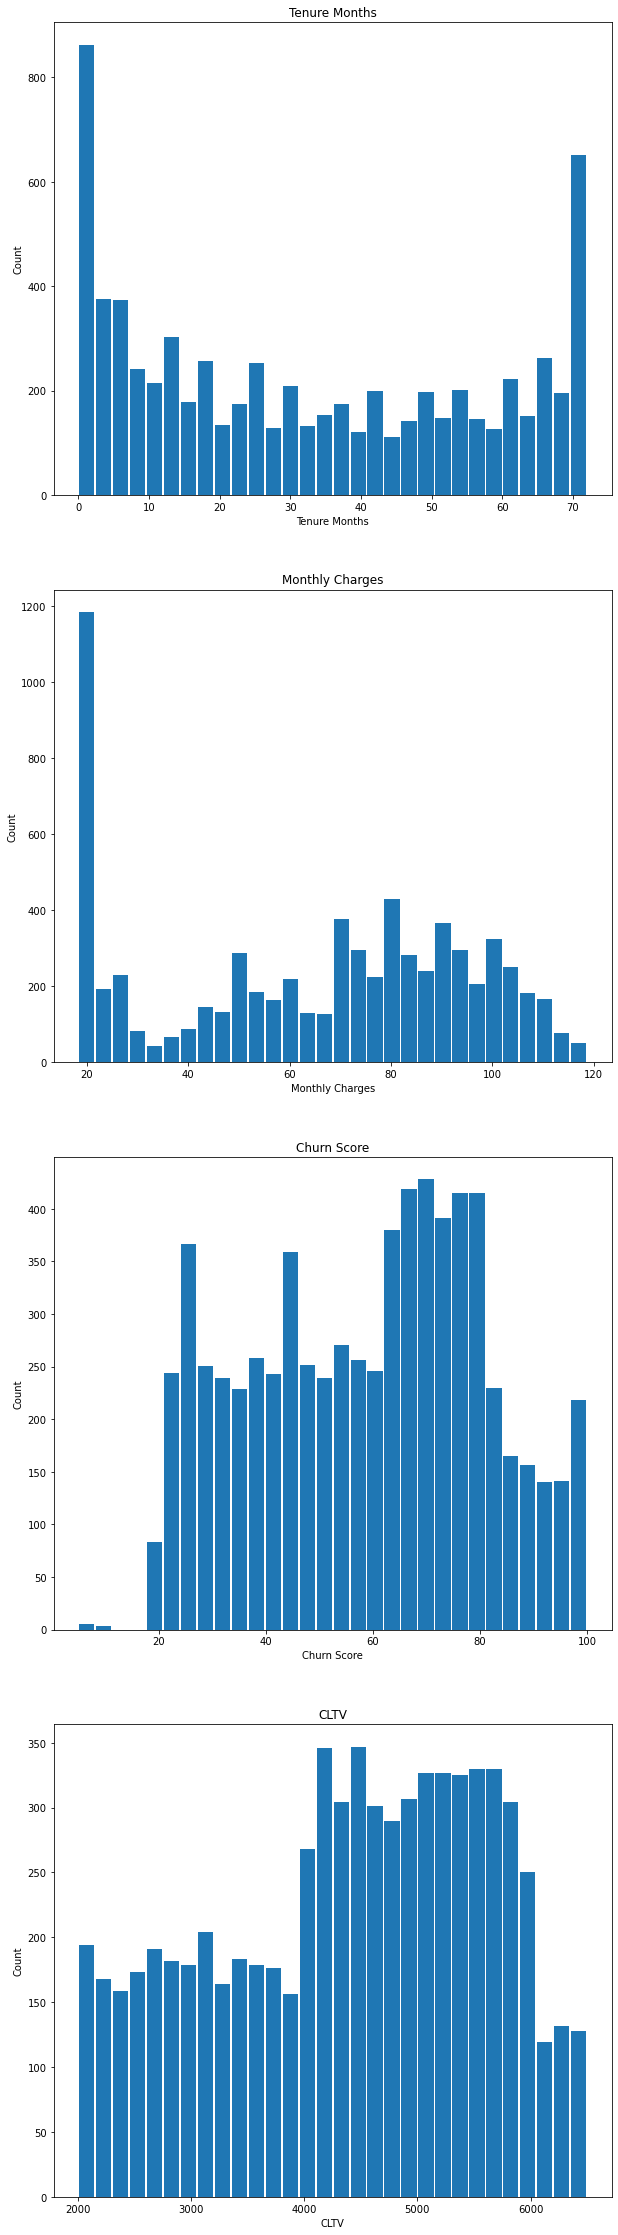

In [14]:
hist_cols = ['Tenure Months','Monthly Charges', 'Churn Score', 'CLTV']


fig, axs = plt.subplots(len(hist_cols), 1, figsize = (10, 10 * len(hist_cols)  )    )

sub=0

for k in hist_cols:
    #axs[hist_cols.index(k)].hist(churn[k], bins = 30)
    sub+=1
    plt.subplot(len(hist_cols), 1, sub)    
    plt.hist(churn[k], bins = 30, rwidth=0.9)
    plt.title(k);
    plt.xlabel(k);
    plt.ylabel('Count');
    

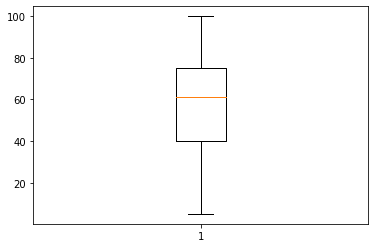

In [15]:
plt.boxplot(churn['Churn Score']);

In [16]:
[(churn['Churn Score'] < 20).sum(), churn['Churn Score'].count()]

[8, 7043]

##### There look to be outliers in churn score below 20. this is worth exploring more during EDA phase

### B. Status: this gives more insight into the customer experience

In [17]:
file = 'Dataset1/Telco_customer_churn_status.xlsx'
sheet = 'Telco_Churn'

status = pd.read_excel(file, sheet)

In [18]:
status.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [19]:
status.tail()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
7038,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN
7042,3186-AJIEK,1,Q3,4,Stayed,No,0,38,5097,NaN,NaN


In [20]:
status.sample(7)

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
6388,2325-NBPZG,1,Q3,3,Joined,No,0,58,5125,NaN,NaN
4768,8566-YPRGL,1,Q3,4,Joined,No,0,23,5279,NaN,NaN
6498,0071-NDAFP,1,Q3,3,Stayed,No,0,65,5230,NaN,NaN
3581,1371-OJCEK,1,Q3,5,Stayed,No,0,70,4200,NaN,NaN
2482,4597-ELFTS,1,Q3,3,Churned,Yes,1,92,5327,Attitude,Attitude of support person
5859,6135-OZQVA,1,Q3,4,Stayed,No,0,51,4389,NaN,NaN
1293,4289-DTDKW,1,Q3,1,Churned,Yes,1,70,2576,Competitor,Competitor had better devices


In [21]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


In [22]:
status.describe()

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,5.000000,1.000000,96.000000,6500.000000


### C. Services: this provides information about the products for each customer

In [23]:
file = 'Dataset1/Telco_customer_churn_services.xlsx'
sheet = 'Telco_Churn'

services = pd.read_excel(file, sheet)

In [24]:
services.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [25]:
services.tail()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21
7042,3186-AJIEK,1,Q3,No,0,66,None,Yes,30.96,No,...,Yes,Two Year,Yes,Bank Withdrawal,105.65,6844.50,0.00,0,2043.36,8887.86


In [26]:
services.sample(7)

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
4929,6823-SIDFQ,1,Q3,No,0,28,Offer C,Yes,40.39,No,...,No,One Year,No,Credit Card,18.25,534.70,0.0,0,1130.92,1665.62
1095,4726-DLWQN,1,Q3,No,0,50,Offer B,Yes,25.23,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,70.35,3454.60,0.0,100,1261.50,4816.10
3332,9408-HRXRK,1,Q3,Yes,9,45,None,Yes,47.48,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,105.15,4730.90,0.0,0,2136.60,6867.50
4668,2229-VWQJH,1,Q3,No,0,24,None,Yes,4.82,No,...,Yes,Month-to-Month,Yes,Credit Card,49.30,1233.25,0.0,0,115.68,1348.93
693,0093-EXYQL,1,Q3,No,0,40,None,Yes,44.14,No,...,Yes,Two Year,Yes,Bank Withdrawal,91.55,3673.60,0.0,0,1765.60,5439.20
3160,5002-GCQFH,1,Q3,Yes,1,49,Offer B,Yes,47.17,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,93.85,4733.10,0.0,30,2311.33,7074.43
4485,8735-NBLWT,1,Q3,No,0,9,Offer E,Yes,45.83,No,...,No,Month-to-Month,No,Credit Card,20.40,184.10,0.0,0,412.47,596.57


In [27]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [28]:
services.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


### D. Demographics: this gives more insight into who the customer is, irrespective of their Telco service

In [29]:
file = 'Dataset1/Telco_customer_churn_demographics.xlsx'
sheet = 'Telco_Churn'

demog = pd.read_excel(file, sheet)

In [30]:
demog.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [31]:
demog.tail()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
7038,2569-WGERO,1,Female,30,No,No,No,No,0
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2
7042,3186-AJIEK,1,Male,44,No,No,No,No,0


In [32]:
demog.sample(7)

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
6107,0675-NCDYU,1,Female,61,No,No,Yes,Yes,2
2509,1041-RXHRA,1,Female,25,Yes,No,No,No,0
4507,5652-MSDEY,1,Female,37,No,No,No,No,0
2172,8780-IXSTS,1,Female,53,No,No,No,No,0
453,3990-QYKBE,1,Male,74,No,Yes,Yes,No,0
6356,4853-OITSN,1,Male,33,No,No,Yes,No,0
5823,7113-HIPFI,1,Male,59,No,No,Yes,Yes,2


In [33]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [34]:
demog.describe()

,Count,Age,Number of Dependents
count,7043.0,7043.000000,7043.000000
mean,1.0,46.509726,0.468692
std,0.0,16.750352,0.962802
min,1.0,19.000000,0.000000
25%,1.0,32.000000,0.000000
50%,1.0,46.000000,0.000000
75%,1.0,60.000000,0.000000
max,1.0,80.000000,9.000000


### E. Location: this gives more stats about the location of each customer, based on their zip code

In [35]:
file = 'Dataset1/Telco_customer_churn_location.xlsx'
sheet = 'Telco_Churn'

location = pd.read_excel(file, sheet)

In [36]:
location.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [37]:
location.tail()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503


In [38]:
location.sample(7)

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
4891,0795-GMVQO,1,United States,California,San Diego,92105,"32.741859, -117.090353",32.741859,-117.090353
6345,6888-SBYAI,1,United States,California,San Ramon,94583,"37.766556, -121.976784",37.766556,-121.976784
3565,1971-DTCZB,1,United States,California,Yreka,96097,"41.764869, -122.671316",41.764869,-122.671316
2120,4398-HSCJH,1,United States,California,Los Angeles,90013,"34.044639, -118.240413",34.044639,-118.240413
6473,5010-IPEAQ,1,United States,California,Escalon,95320,"37.818543, -121.006907",37.818543,-121.006907
155,7641-EUYET,1,United States,California,Tranquillity,93668,"36.635661, -120.288644",36.635661,-120.288644
4502,7503-EPSZW,1,United States,California,River Pines,95675,"38.545775, -120.743325",38.545775,-120.743325


In [39]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  7043 non-null   object 
 1   Count        7043 non-null   int64  
 2   Country      7043 non-null   object 
 3   State        7043 non-null   object 
 4   City         7043 non-null   object 
 5   Zip Code     7043 non-null   int64  
 6   Lat Long     7043 non-null   object 
 7   Latitude     7043 non-null   float64
 8   Longitude    7043 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 495.3+ KB


In [40]:
location.describe()

,Count,Zip Code,Latitude,Longitude
count,7043.0,7043.000000,7043.000000,7043.000000
mean,1.0,93486.070567,36.197455,-119.756684
std,0.0,1856.767505,2.468929,2.154425
min,1.0,90001.000000,32.555828,-124.301372
25%,1.0,92101.000000,33.990646,-121.788090
50%,1.0,93518.000000,36.205465,-119.595293
75%,1.0,95329.000000,38.161321,-117.969795
max,1.0,96150.000000,41.962127,-114.192901


### F. Population:  This gives the population of the customer's zipcode.

In [41]:
file = 'Dataset1/Telco_customer_churn_population.xlsx'
sheet = 'Population'

population = pd.read_excel(file, sheet)

In [42]:
population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [43]:
population.tail()

,ID,Zip Code,Population
1666,1667,96145,4002
1667,1668,96146,942
1668,1669,96148,678
1669,1670,96150,33038
1670,1671,96161,15783


In [44]:
population.sample(7)

,ID,Zip Code,Population
723,724,93429,210
257,258,91741,24973
383,384,92173,28488
1545,1546,95975,1601
534,535,92602,2762
654,655,93218,823
486,487,92398,1195


In [45]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          1671 non-null   int64
 1   Zip Code    1671 non-null   int64
 2   Population  1671 non-null   int64
dtypes: int64(3)
memory usage: 39.3 KB


In [46]:
population.describe()

,ID,Zip Code,Population
count,1671.000000,1671.000000,1671.000000
mean,836.000000,93678.992220,20276.384201
std,482.520466,1817.763591,20689.117300
min,1.000000,90001.000000,11.000000
25%,418.500000,92269.000000,1789.000000
50%,836.000000,93664.000000,14239.000000
75%,1253.500000,95408.000000,32942.500000
max,1671.000000,96161.000000,105285.000000


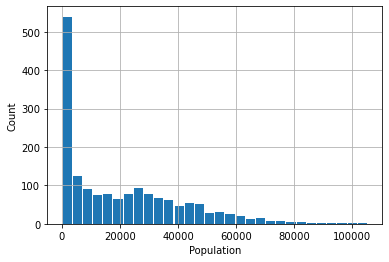

In [47]:
population['Population'].hist(bins = 30, rwidth = 0.9);
plt.xlabel('Population');
plt.ylabel('Count');


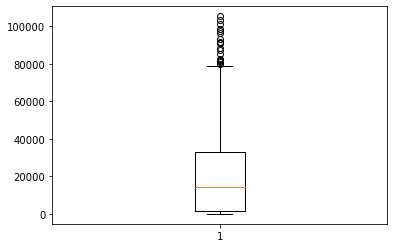

In [48]:
plt.boxplot(population['Population']);

In [49]:
[np.percentile(population['Population'], k) for k in [0,25,50,75,100]]

[11.0, 1789.0, 14239.0, 32942.5, 105285.0]

In [50]:
[(population['Population'] > 85000).sum(), population['Population'].count()]

[12, 1671]

##### there are very few zipcodes with population >85K and even less >100K.  This is worth exploring during EDA to see if thse have different characteristics or chrun profile.  Not quiite ready to remove the data given they aren't very far from the rest of the data. Not until I better understand why these populations are at this level and if it's impacting the data.

### Join data from datasets into new consolidated DF: telco

In [51]:
telco = pd.merge(churn, status[['Customer ID', 'Satisfaction Score','Churn Category']], 
                 how = 'left', left_on = 'CustomerID', right_on = 'Customer ID')

telco = telco.drop('Customer ID', 1)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          7043 non-null   object 
 1   Count               7043 non-null   int64  
 2   Country             7043 non-null   object 
 3   State               7043 non-null   object 
 4   City                7043 non-null   object 
 5   Zip Code            7043 non-null   int64  
 6   Lat Long            7043 non-null   object 
 7   Latitude            7043 non-null   float64
 8   Longitude           7043 non-null   float64
 9   Gender              7043 non-null   object 
 10  Senior Citizen      7043 non-null   object 
 11  Partner             7043 non-null   object 
 12  Dependents          7043 non-null   object 
 13  Tenure Months       7043 non-null   int64  
 14  Phone Service       7043 non-null   object 
 15  Multiple Lines      7043 non-null   object 
 16  Intern

In [52]:
telco = pd.merge(telco, services[['Customer ID', 'Avg Monthly GB Download', 'Unlimited Data', 'Total Long Distance Charges',
                                  'Referred a Friend', 'Number of Referrals']], 
                 how = 'left', left_on = 'CustomerID', right_on = 'Customer ID') 

telco = telco.drop('Customer ID', 1)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   7043 non-null   object 
 1   Count                        7043 non-null   int64  
 2   Country                      7043 non-null   object 
 3   State                        7043 non-null   object 
 4   City                         7043 non-null   object 
 5   Zip Code                     7043 non-null   int64  
 6   Lat Long                     7043 non-null   object 
 7   Latitude                     7043 non-null   float64
 8   Longitude                    7043 non-null   float64
 9   Gender                       7043 non-null   object 
 10  Senior Citizen               7043 non-null   object 
 11  Partner                      7043 non-null   object 
 12  Dependents                   7043 non-null   object 
 13  Tenure Months     

In [53]:
telco = pd.merge(telco, demog[['Customer ID', 'Age', 'Under 30' ] ],
                 how = 'left', left_on = 'CustomerID', right_on = 'Customer ID') 

telco = telco.drop('Customer ID', 1)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   7043 non-null   object 
 1   Count                        7043 non-null   int64  
 2   Country                      7043 non-null   object 
 3   State                        7043 non-null   object 
 4   City                         7043 non-null   object 
 5   Zip Code                     7043 non-null   int64  
 6   Lat Long                     7043 non-null   object 
 7   Latitude                     7043 non-null   float64
 8   Longitude                    7043 non-null   float64
 9   Gender                       7043 non-null   object 
 10  Senior Citizen               7043 non-null   object 
 11  Partner                      7043 non-null   object 
 12  Dependents                   7043 non-null   object 
 13  Tenure Months     

In [54]:
population['ID'] = population['ID'].astype('str')

In [55]:
telco = pd.merge(telco, population[['ID', 'Population' ] ],
                 how = 'left', left_on = 'CustomerID', right_on = 'ID') 

telco = telco.drop('ID', 1)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   7043 non-null   object 
 1   Count                        7043 non-null   int64  
 2   Country                      7043 non-null   object 
 3   State                        7043 non-null   object 
 4   City                         7043 non-null   object 
 5   Zip Code                     7043 non-null   int64  
 6   Lat Long                     7043 non-null   object 
 7   Latitude                     7043 non-null   float64
 8   Longitude                    7043 non-null   float64
 9   Gender                       7043 non-null   object 
 10  Senior Citizen               7043 non-null   object 
 11  Partner                      7043 non-null   object 
 12  Dependents                   7043 non-null   object 
 13  Tenure Months     

In [56]:
telco_archive = telco.copy()

In [57]:
 telco = telco_archive.copy()

### Change zip from int

In [58]:
telco['Zip Code'] = telco['Zip Code'].astype('string')

In [59]:
telco[['Zip Code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Zip Code  7043 non-null   string
dtypes: string(1)
memory usage: 110.0 KB


### Change yes/no to 1/0

In [60]:
yes_no_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Referred a Friend', 'Phone Service', 'Unlimited Data', 'Paperless Billing', 'Under 30']

k_cols = yes_no_cols

for k in k_cols:
    telco[k] = telco[k].map({'No': 0, 'Yes': 1})

In [61]:
telco[yes_no_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Senior Citizen     7043 non-null   int64
 1   Partner            7043 non-null   int64
 2   Dependents         7043 non-null   int64
 3   Referred a Friend  7043 non-null   int64
 4   Phone Service      7043 non-null   int64
 5   Unlimited Data     7043 non-null   int64
 6   Paperless Billing  7043 non-null   int64
 7   Under 30           7043 non-null   int64
dtypes: int64(8)
memory usage: 495.2 KB


In [62]:
telco[yes_no_cols].describe()

,Senior Citizen,Partner,Dependents,Referred a Friend,Phone Service,Unlimited Data,Paperless Billing,Under 30
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.231010,0.457476,0.903166,0.673719,0.592219,0.198921
std,0.368612,0.499748,0.421508,0.498224,0.295752,0.468885,0.491457,0.399217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   7043 non-null   object 
 1   Count                        7043 non-null   int64  
 2   Country                      7043 non-null   object 
 3   State                        7043 non-null   object 
 4   City                         7043 non-null   object 
 5   Zip Code                     7043 non-null   string 
 6   Lat Long                     7043 non-null   object 
 7   Latitude                     7043 non-null   float64
 8   Longitude                    7043 non-null   float64
 9   Gender                       7043 non-null   object 
 10  Senior Citizen               7043 non-null   int64  
 11  Partner                      7043 non-null   int64  
 12  Dependents                   7043 non-null   int64  
 13  Tenure Months     

## Data Cleaning

In [64]:
telco.describe()

,Count,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,...,CLTV,Satisfaction Score,Avg Monthly GB Download,Unlimited Data,Total Long Distance Charges,Referred a Friend,Number of Referrals,Age,Under 30,Population
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,0.0
mean,1.0,36.282441,-119.798880,0.162147,0.483033,0.231010,32.371149,0.903166,0.592219,64.761692,...,4400.295755,3.244924,20.515405,0.673719,749.099262,0.457476,1.951867,46.509726,0.198921,NaN
std,0.0,2.455723,2.157889,0.368612,0.499748,0.421508,24.559481,0.295752,0.491457,30.090047,...,1183.057152,1.201657,20.418940,0.468885,846.660055,0.498224,3.001199,16.750352,0.399217,NaN
min,1.0,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,...,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,NaN
25%,1.0,34.030915,-121.815412,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,...,3469.000000,3.000000,3.000000,0.000000,70.545000,0.000000,0.000000,32.000000,0.000000,NaN
50%,1.0,36.391777,-119.730885,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,...,4527.000000,3.000000,17.000000,1.000000,401.440000,0.000000,0.000000,46.000000,0.000000,NaN
75%,1.0,38.224869,-118.043237,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,89.850000,...,5380.500000,4.000000,27.000000,1.000000,1191.100000,1.000000,3.000000,60.000000,0.000000,NaN
max,1.0,41.962127,-114.192901,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,...,6500.000000,5.000000,85.000000,1.000000,3564.720000,1.000000,11.000000,80.000000,1.000000,NaN
